In [1]:
import text_transformer as tt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from ipywidgets import widgets
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np


remove_tokens = ["’", "‘", "would", "said", "also", "“", "”", "–"]
filter_words = ["Trump", "Brexit", "Syria"]
%time articles, tokenzied = tt.preprocessing(directory="articles", verbose= True, remove_words=remove_tokens, filter_words=filter_words)
sia = SentimentIntensityAnalyzer()
articles_df = pd.DataFrame.from_dict(articles)
articles_df = articles_df.merge(articles_df.text.apply(lambda article: pd.Series(sia.polarity_scores(article))), 
    left_index=True, right_index=True)

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


We're at 0.0% of the data.
We're at 2.51% of the data.
We're at 5.01% of the data.
We're at 7.52% of the data.
We're at 10.03% of the data.
We're at 12.53% of the data.
We're at 15.04% of the data.
We're at 17.55% of the data.
We're at 20.05% of the data.
We're at 22.56% of the data.
We're at 25.06% of the data.
We're at 27.57% of the data.
We're at 30.08% of the data.
We're at 32.58% of the data.
We're at 35.09% of the data.
We're at 37.6% of the data.
We're at 40.1% of the data.
We're at 42.61% of the data.
We're at 45.12% of the data.
We're at 47.62% of the data.
We're at 50.13% of the data.
We're at 52.64% of the data.
We're at 55.14% of the data.
We're at 57.65% of the data.
We're at 60.15% of the data.
We're at 62.66% of the data.
We're at 65.17% of the data.
We're at 67.67% of the data.
We're at 70.18% of the data.
We're at 72.69% of the data.
We're at 75.19% of the data.
We're at 77.7% of the data.
We're at 80.21% of the data.
We're at 82.71% of the data.
We're at 85.22% of the

### Color palette for the selected newspapers

In [2]:
colors = {
    'dailymail': "#004db3",
    'thetimes': '#333333',
    'theguardian': '#052962',
    'reuters': '#ff8000',
    'ft': '#fff1e5',
    'euronews':'#003865',
    'yahoo': '#400090',
    'wsj': '#333333',
    'breitbart': '#ff550f',
    'foxnews': '#c20017',
    'aljazeera': '#fa9000',
    'nytimes': '#333333',
    'cbc': '#e60505',
    'nbcnews': '#102039',
    'latimes': '#333333',
    'go': '#ffffff',
    'huffpost': '#0DBE98'
}

In [82]:
%matplotlib notebook

# Axis to be ploted, possible options neg, pos, neu and compound
y_axis="pos"
x_axis="neg"

#https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
# Ploting a regression line in matplotlib is strangly hard
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    ax = plt.gca()
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color=colors[drop_newspapers.value])

def action(words):
    plt.cla()
    ax=plt.gca()
    ax.set_xlim([-0.025,0.4])
    ax.set_ylim([-0.025,0.4])
    plot_alpha = 0.2
    selected_plot_alpha = 0.8
    centroid_alpha = 0.85
    selected_centroid_alpha = 1

    df = articles_df[articles_df.text.str.contains(drop_words.value)]
    #Plot the centroids for all newspapers and lower transparency in the scatter
    if centroid.value:
        plot_alpha = 0.025
        selected_plot_alpha = 0.15

    #Plot pre computed regression for selected newspaper
    if regression.value and drop_newspapers.value != "" :
        reg = LinearRegression()
        reg_articles = df[df.newspaper.isin([drop_newspapers.value])]
        if reg_articles.shape[0] > 0:
            reg.fit(reg_articles[x_axis].values.reshape(-1, 1) , reg_articles[y_axis])
            abline(reg.coef_, reg.intercept_)

    #Plot the scatter plot
    sns.scatterplot(data=df[~df.newspaper.isin([drop_newspapers.value])],
                    y=y_axis, x=x_axis, hue="newspaper", label="Other newspapers", 
                    s=100, alpha=plot_alpha, palette=colors , ax=ax)
    sns.scatterplot(data=df[df.newspaper.isin([drop_newspapers.value])], 
                    y=y_axis, x=x_axis, hue="newspaper", label="Selected Newspaper" ,
                    s=100,alpha=selected_plot_alpha, palette=colors , ax=ax)
    if centroid.value:
        centers = df.groupby("newspaper").mean().reset_index()
        sns.scatterplot(data=centers[~centers.newspaper.isin([drop_newspapers.value])],
                        y=y_axis, x=x_axis, hue="newspaper", label="Other newspapers", 
                        s=200, alpha=centroid_alpha, palette=colors , ax=ax)
        sns.scatterplot(data=centers[centers.newspaper.isin([drop_newspapers.value])], 
                        y=y_axis, x=x_axis, hue="newspaper", label="Selected Newspaper" 
                        ,alpha=selected_centroid_alpha, s=200, palette=colors , ax=ax)
    topic_bar.value = str(int(df.text.str.len().mean())) 
    if drop_newspapers.value != '':
        newspaper_bar.value = articles_df[articles_df.newspaper.isin([drop_newspapers.value])].text.str.len().mean()
        topic_newspaper_bar.value = df[df.newspaper.isin([drop_newspapers.value])].text.str.len().mean()
    textArea.value = "Showing data for newspaper: " + drop_newspapers.value + "\nRelating topic: "+ drop_words.value
    

## UI components

In [93]:
##### Ipython UI components
drop_words = widgets.Dropdown(
    options=np.append(filter_words, [""]),
    description='Word:',
    value=""
)
drop_topics = widgets.Dropdown(
    options=["topic1","topic2", "topic3"],
    description='Topics:'
)
topic_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Topic:',
    bar_style='info', 
    orientation='horizontal'
)
newspaper_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Newspaper:',
    bar_style='success', 
    orientation='horizontal'
)
topic_newspaper_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Paper Topic:',
    bar_style='warning', 
    orientation='horizontal'
)
textArea = widgets.Textarea(
    value='',
    layout=widgets.Layout(width='50%', height='120px'),
    description = "Other Info:",
    disabled=True
)
drop_newspapers = widgets.Dropdown(
    options=np.append(articles_df.newspaper.unique(), [""]),
    description='Newspaper:',
    value=""
)
regression = widgets.Checkbox(False, description='Regression')
centroid = widgets.Checkbox(False, description='Centroid')



# Add actions to Ipython components
regression.observe(action)
centroid.observe(action)
drop_newspapers.observe(action)
drop_words.observe(action)

# Display them after the plot
items_lda = widgets.Box([item for item in [drop_words, drop_topics]])
bars = widgets.VBox([item for item in [topic_bar, newspaper_bar, topic_newspaper_bar]])
info_area = widgets.HBox([item for item in [bars, textArea]])
# Display them after the plot
items_sentiment = widgets.Box([item for item in [drop_newspapers, regression, centroid]])


/opt/conda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


## Render the whole thing

Box(children=(Dropdown(description='Word:', index=3, options=('Trump', 'Brexit', 'Syria', ''), value=''), Drop…

Box(children=(Dropdown(description='Newspaper:', index=17, options=('dailymail', 'breitbart', 'nbcnews', 'thet…

<IPython.core.display.Javascript object>


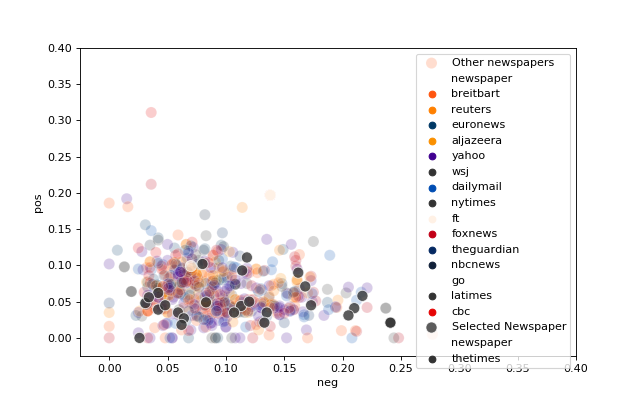

In [94]:
# Display the widgets
display(items_lda)
display(info_area)
display(items_sentiment)
#Plot size
plt.figure("Pos/Neg Plot",figsize=(8,5),edgecolor="b",facecolor="b",frameon=False)
# Plot the inital plot
action(drop_newspapers.value)

In [89]:
articles_df.text.str.len().quantile(0.85)

7125.099999999999